In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# for reproducibility
np.random.seed(42)

# loading dataset
df = pd.read_csv("parkinsons.csv")

print(df.shape)
df.head()


(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
# dropping the non-numeric identifier column
df_clean = df.drop(columns=["name"])

# separating features and target
X = df_clean.drop(columns=["status"])
y = df_clean["status"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Features shape: (195, 22)
Target shape: (195,)
Train shape: (156, 22) (156,)
Test shape: (39, 22) (39,)


In [3]:
# training a linear SVM classifier
svm_clf = SVC(kernel="linear", random_state=42)

svm_clf.fit(X_train_scaled, y_train)

# predictions on test data
y_pred = svm_clf.predict(X_test_scaled)

# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")


Accuracy : 0.949
Precision: 0.935
Recall   : 1.000
F1-score : 0.967


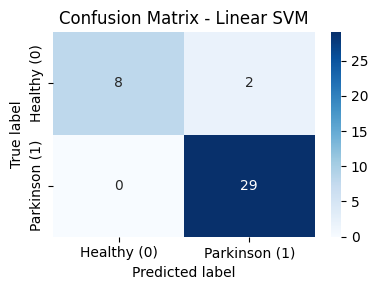

In [4]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Healthy (0)", "Parkinson (1)"],
    yticklabels=["Healthy (0)", "Parkinson (1)"]
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Linear SVM")
plt.tight_layout()
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier

# training a Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_clf.fit(X_train_scaled, y_train)

# predictions on test data
y_pred_rf = rf_clf.predict(X_test_scaled)

# evaluation metrics for RF
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy : {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall   : {recall_rf:.3f}")
print(f"F1-score : {f1_rf:.3f}")


Random Forest:
Accuracy : 0.923
Precision: 0.933
Recall   : 0.966
F1-score : 0.949


In [6]:
print("SVM vs Random Forest (test set):")
print(f"SVM  - Acc: {accuracy:.3f}, F1: {f1:.3f}")
print(f"RF   - Acc: {accuracy_rf:.3f}, F1: {f1_rf:.3f}")


SVM vs Random Forest (test set):
SVM  - Acc: 0.949, F1: 0.967
RF   - Acc: 0.923, F1: 0.949
